#### FastAI and UNet
- Reference: https://www.youtube.com/watch?v=DKzL4zumFi8
- https://walkwithfastai.com/Segmentation

In [1]:
import os
import numpy as np
from pathlib import Path

from fastai.vision.all import *
from fastai.vision.learner import load_learner

cwd = Path.cwd()
path = os.path.join(cwd, "val_images")
WEIGHTS_BIN = os.path.join(cwd.parent, "models", "battus10_segmentation_test-4classes-resnet34-b2-e10.pkl")

In [2]:
codes = np.loadtxt(os.path.join(path, "codes.txt"), dtype='str')
codes

array(['background', 'lepidopteran', 'tags', 'ruler'], dtype='<U12')

In [3]:
files = get_image_files(os.path.join(path, "images"))
print("Total Images:", len(files), " \t Sample: ", files[0])

Total Images: 2  	 Sample:  /mnt/c/workspace/eebio/battus-museum/mothra/data/val_images/images/IMG_3870.JPG


In [4]:
def label_func(image):
    """Function used to label images while training. Required by fastai."""
    return os.path.join(path, "labels", f"{image.stem}.png")

<Axes: >

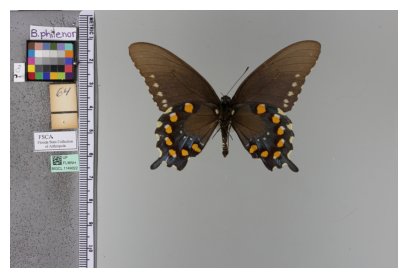

In [5]:
img = PILImage.create(files[1])
img.show(figsize=(5,5))

<Axes: >

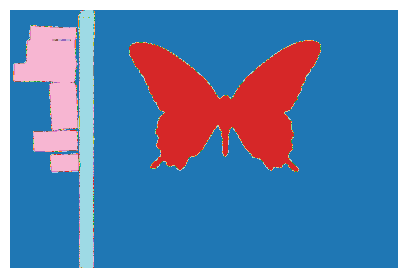

In [6]:
msk = PILMask.create(label_func(files[1]))
msk.show(figsize=(5,5), alpha=1)

In [7]:
print("Unique labels:",np.unique(msk))
tensor(msk)

Unique labels: [0 1 2 3]


tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [8]:
name2id = {v:k for k,v in enumerate(codes)}
name2id

{'background': 0, 'lepidopteran': 1, 'tags': 2, 'ruler': 3}

In [10]:
dls = SegmentationDataLoaders.from_label_func(path, bs=2, fnames=files, label_func=label_func, codes=codes)

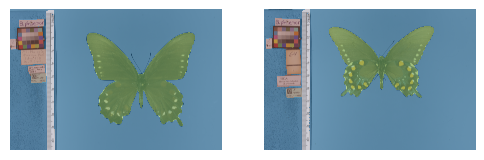

In [11]:
dls.show_batch()

In [11]:
# Now, loading the model 
print("Skip weight check and use the local weights: ", WEIGHTS_BIN)
learner = load_learner(fname=WEIGHTS_BIN)

Skip weight check and use the local weights:  /home/rahul/workspace/personal/eebio/battus-museum/mothra/models/battus10_segmentation_test-4classes-resnet34-b2-e10.pkl


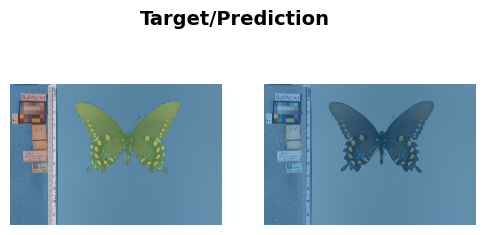

In [12]:
learner.show_results(dl=dls)

In [13]:
learner.tta(dl=dls)

(TensorBase([[[[0.3476, 0.4184, 0.4383,  ..., 0.4958, 0.4695, 0.3863],
               [0.4165, 0.5376, 0.5493,  ..., 0.6861, 0.6518, 0.5056],
               [0.4523, 0.5692, 0.5705,  ..., 0.7691, 0.7825, 0.6283],
               ...,
               [0.6128, 0.7412, 0.8039,  ..., 0.5968, 0.5686, 0.4362],
               [0.4891, 0.6160, 0.6730,  ..., 0.5463, 0.4486, 0.3626],
               [0.3992, 0.4597, 0.5192,  ..., 0.4463, 0.3644, 0.2972]],
 
              [[0.1614, 0.1372, 0.1044,  ..., 0.1019, 0.1046, 0.1230],
               [0.1213, 0.0935, 0.0648,  ..., 0.0439, 0.0556, 0.0814],
               [0.1163, 0.0896, 0.0664,  ..., 0.0272, 0.0347, 0.0649],
               ...,
               [0.0745, 0.0375, 0.0148,  ..., 0.0512, 0.0713, 0.1285],
               [0.0992, 0.0622, 0.0310,  ..., 0.0636, 0.1053, 0.1519],
               [0.1236, 0.1014, 0.0663,  ..., 0.0920, 0.1407, 0.1912]],
 
              [[0.2347, 0.1977, 0.2344,  ..., 0.1551, 0.1851, 0.1894],
               [0.1936, 0.1562,